In [27]:
import numpy as np
import matplotlib.pylab as plt
import utils as u
from datetime import datetime
from datetime import timedelta
from scipy.fftpack import dct
import cv2
from DCT import custom_dct2

In [4]:
# plot setting
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

In [5]:
dimensions = [20, 40, 80, 160]

timing = {
    "HomeMade": [],  # timing with our method
    "FFT-c": [],  # timing with cv2 method
    "FFT-s": []  # timing with scipy method
}
timing2 = {
    "HomeMade": [],  # timing with our method
    "FFT-c": [],  # timing with cv2 method
    "FFT-s": []  # timing with scipy method
}
results = {
    "HomeMade": [],  # results with our method
    "FFT-c": [],  # results with cv2 method
    "FFT-s": []  # results with scipy method
}

In [6]:
for n in dimensions:
    print(n)
    matrix = np.random.randint(0, 256, size=(n, n))
    t0 = datetime.now()
    results["FFT-s"].append(dct(matrix, type=2))
    t1 = datetime.now()
    results["FFT-c"].append(cv2.dct(np.float32(matrix)))
    t2 = datetime.now()
    results["HomeMade"].append(custom_dct2(matrix))
    t3 = datetime.now()

    timing2["HomeMade"].append(t3 - t2)
    timing2["FFT-c"].append(t2 - t1)
    timing2["FFT-s"].append(t1 - t0)

timing2

20
40
80
160


{'HomeMade': [datetime.timedelta(microseconds=673748),
  datetime.timedelta(seconds=10, microseconds=745766),
  datetime.timedelta(seconds=172, microseconds=874079),
  datetime.timedelta(seconds=2773, microseconds=775356)],
 'FFT-c': [datetime.timedelta(microseconds=585),
  datetime.timedelta(microseconds=281),
  datetime.timedelta(microseconds=138),
  datetime.timedelta(microseconds=343)],
 'FFT-s': [datetime.timedelta(microseconds=1464),
  datetime.timedelta(microseconds=259),
  datetime.timedelta(microseconds=198),
  datetime.timedelta(microseconds=236)]}

In [29]:
test2 = {'HomeMade': [ timedelta(microseconds=673748),
  timedelta(microseconds=673748),
  timedelta(seconds=10, microseconds=745766),
  timedelta(seconds=172, microseconds=874079),
  timedelta(seconds=2773, microseconds=775356)],
 'FFT-c': [timedelta(microseconds=585),
  timedelta(microseconds=281),
  timedelta(microseconds=138),
  timedelta(microseconds=343)],
 'FFT-s': [timedelta(microseconds=1464),
  timedelta(microseconds=259),
  timedelta(microseconds=198),
  timedelta(microseconds=236)]}
test2

{'HomeMade': [datetime.timedelta(microseconds=673748),
  datetime.timedelta(microseconds=673748),
  datetime.timedelta(seconds=10, microseconds=745766),
  datetime.timedelta(seconds=172, microseconds=874079),
  datetime.timedelta(seconds=2773, microseconds=775356)],
 'FFT-c': [datetime.timedelta(microseconds=585),
  datetime.timedelta(microseconds=281),
  datetime.timedelta(microseconds=138),
  datetime.timedelta(microseconds=343)],
 'FFT-s': [datetime.timedelta(microseconds=1464),
  datetime.timedelta(microseconds=259),
  datetime.timedelta(microseconds=198),
  datetime.timedelta(microseconds=236)]}

In [30]:
test = {
    "HomeMade": [],  # timing with our method
    "FFT-c": [],  # timing with cv2 method
    "FFT-s": []  # timing with scipy method
}
for i in range(len(dimensions)):
    test["HomeMade"].append(int(test2["HomeMade"][i].total_seconds() * 1e6))
    test["FFT-c"].append(int(test2["FFT-c"][i].total_seconds() * 1e6))
    test["FFT-s"].append(int(test2["FFT-s"][i].total_seconds() * 1e6))
test

{'HomeMade': [673748, 673748, 10745766, 172874079],
 'FFT-c': [585, 281, 138, 343],
 'FFT-s': [1464, 259, 198, 236]}

In [7]:
for i in range(len(dimensions)):
    timing["HomeMade"].append(int(timing2["HomeMade"][i].total_seconds() * 1e6))
    timing["FFT-c"].append(int(timing2["FFT-c"][i].total_seconds() * 1e6))
    timing["FFT-s"].append(int(timing2["FFT-s"][i].total_seconds() * 1e6))

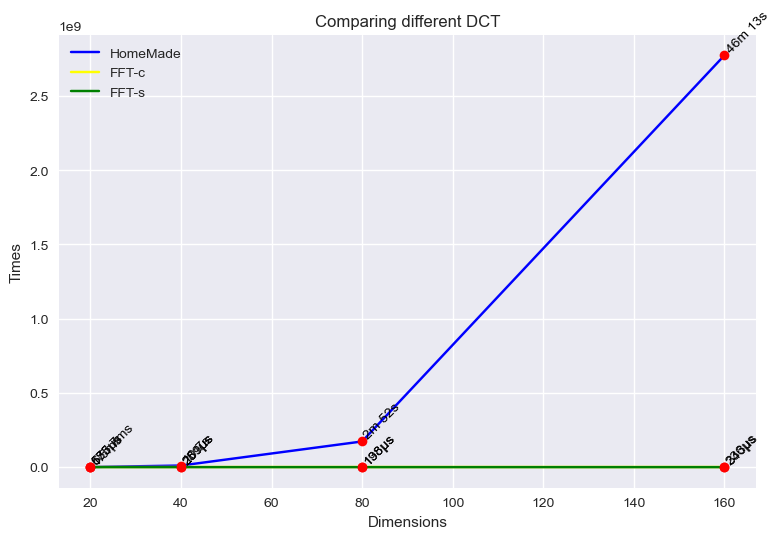

In [8]:
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    plt.plot(dimensions, timing[type], color=col, label=type)
    for i in range(len(dimensions)):
        plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        plt.text(dimensions[i], timing[type][i], u.printTime(
            timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Dimensions')
plt.ylabel('Times')
plt.title('Comparing different DCT')
plt.legend()
plt.show()

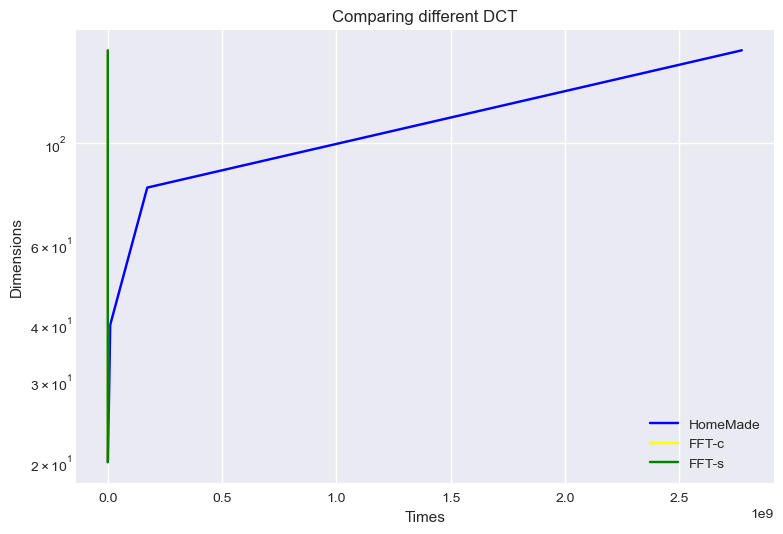

In [9]:
#type = "FFT"
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    plt.semilogy(timing[type], dimensions, color=col, label=type)
    #for i in range(len(dimensions)):
        #plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        #plt.text(dimensions[i], timing[type][i], u.printTime(timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Times')
plt.ylabel('Dimensions')
plt.title('Comparing different DCT')
plt.legend()
plt.show()

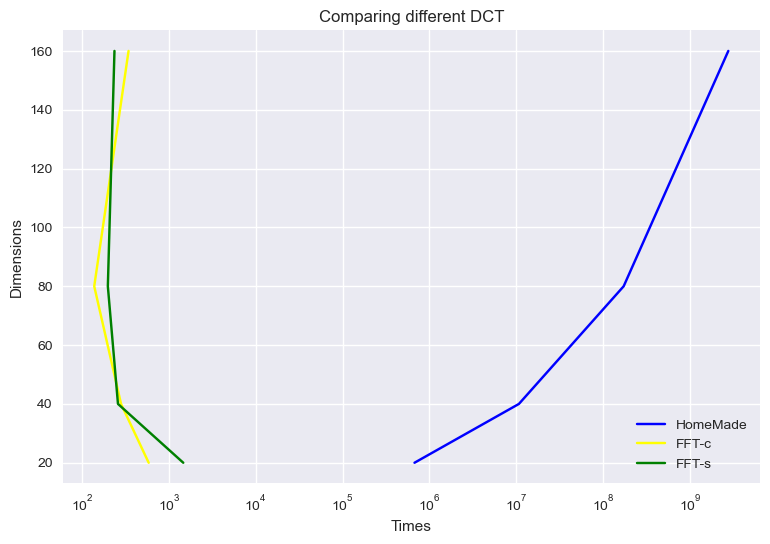

In [10]:
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    plt.semilogx(timing[type], dimensions, color=col, label=type)
    #for i in range(len(dimensions)):
        #plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        #plt.text(dimensions[i], timing[type][i], u.printTime(timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Times')
plt.ylabel('Dimensions')
plt.title('Comparing different DCT')
plt.legend()
plt.show()

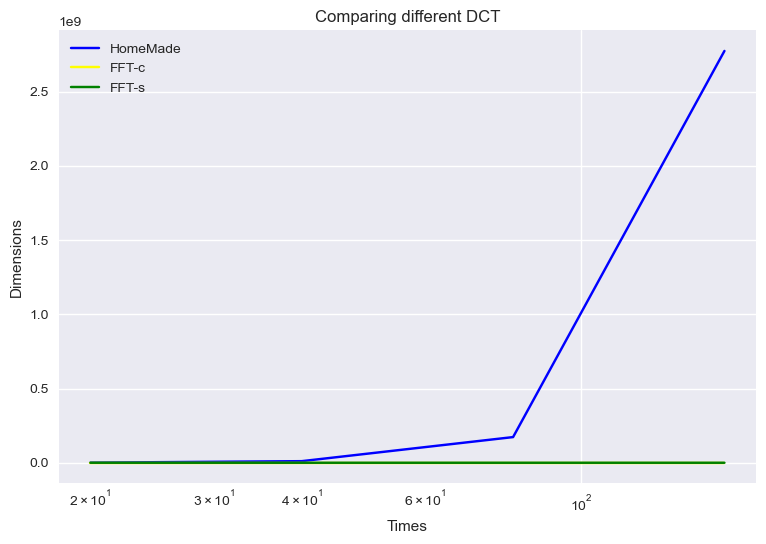

In [11]:
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    plt.semilogx(dimensions, timing[type], color=col, label=type)
    #for i in range(len(dimensions)):
        #plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        #plt.text(dimensions[i], timing[type][i], u.printTime(timing[type][i]), color='black', ha='left', va="bottom", rotation=45)

plt.xlabel('Times')
plt.ylabel('Dimensions')
plt.title('Comparing different DCT')
plt.legend()
plt.show()

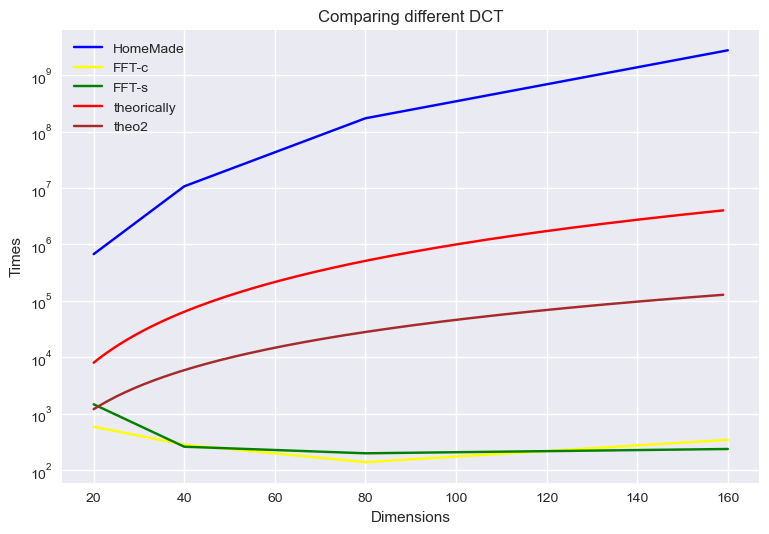

In [22]:
#plt.semilogx(Ns, times_custom, label='DCT2 personalizzata')
n=np.arange(20, 160)
y = n**3
y2 = (n**2)*np.log(n)
for type in timing:
    if type == "FFT-s":
        col = "green"
    elif type == "FFT-c":
        col = "yellow"
    elif type == "HomeMade":
        col = "blue"
    #plt.semilogx(timing[type], dimensions, color=col, label=type)
    plt.semilogy(dimensions, timing[type], color=col, label=type)
    #for i in range(len(dimensions)):
        #plt.plot(dimensions[i], (timing[type][i]), color='red', marker='o')
        #plt.text(dimensions[i], timing[type][i], u.printTime(timing[type][i]), color='black', ha='left', va="bottom", rotation=45)
plt.semilogy(n, y, color='red', label='theorically')
plt.semilogy(n, y2, color='brown', label='theo2')
plt.xlabel('Dimensions')
plt.ylabel('Times')
plt.title('Comparing different DCT')
plt.legend()
plt.show()